# Loading The Necessary

In [45]:

### For data manipulations
import pandas as pd
import numpy as np

### For data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing Neccessaary Libraries which are required for columntransformer, PipeLine, SimpleImputer, MinMaxScaling, OneHotEncoding

In [46]:

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from lazypredict.Supervised import LazyClassifier



# Let's Read the Dataset for Analysis The Productivity

In [47]:


lbdata=pd.read_excel(r"C:\Users\sony\my_first_project\labour.xlsx")


# To Know the Information of the Dataset

In [48]:


lbdata.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Emp ID                      276 non-null    object        
 1   Name                        276 non-null    object        
 2   Age                         269 non-null    float64       
 3   Gender                      276 non-null    object        
 4   Nationality                 276 non-null    object        
 5   Martial Status              276 non-null    object        
 6   Designation                 276 non-null    object        
 7   Experience                  276 non-null    int64         
 8   Work Date                   276 non-null    datetime64[ns]
 9   Site                        276 non-null    object        
 10  Rfid                        276 non-null    object        
 11  Latitude                    276 non-null    float64       

# let's check the shape of the Dataset

In [49]:



print("Shape of the Dataset:", lbdata.shape)


Shape of the Dataset: (276, 25)


# Let's check the Head of the Dataset

In [50]:


lbdata.head()



,Emp ID,Name,Age,Gender,Nationality,Martial Status,Designation,Experience,Work Date,Site,...,Noise Detection,Infrared Sensor,Gas Sensor,GalvanicSkinResponseSensor,SkinTemperatureSensor,BloodVolumePulse,RespirationRateSensor,HeartRateSensor,MotionSensor,Performance
0,2172,James,46.00,Male,Japan,Married,Un-Skilled,14,2022-10-25,Site 2,...,Yes,No,No,6.84,33.55,-18.39,15.60,123,Moving Bricks,Productive
1,1346,Robert,36.00,Male,Japan,Unmarried,Un-Skilled,4,2022-10-25,Site 3,...,Yes,Yes,No,6.59,33.55,-45.77,15.60,122,Welding,Productive
2,2207,John,NaN,Male,China,Married,Semi-Skilled,14,2022-10-25,Site 1,...,No,No,Yes,6.98,33.59,70.09,15.00,122,Moving Stones,Productive
3,4950,Mary,39.00,Female,Malaysia,Married,Un-Skilled,18,2022-10-25,Site 2,...,Yes,Yes,No,6.98,NaN,-48.23,NaN,121,Welding,Productive
4,2016,Michael,51.00,Male,China,Unmarried,Skilled,11,2022-10-25,Site 2,...,No,Yes,No,7.09,33.57,7.87,14.70,120,Cutting Bricks,Productive


# To know the Names of Each Column in Dataset

In [51]:


lbdata.columns



Index(['Emp ID', 'Name', 'Age', 'Gender', 'Nationality', 'Martial Status',
       'Designation', 'Experience', 'Work Date', 'Site', 'Rfid', 'Latitude',
       'Longitude', 'Work Started Time', 'Body Temperature', 'Noise Detection',
       'Infrared Sensor', 'Gas Sensor', 'GalvanicSkinResponseSensor',
       'SkinTemperatureSensor', 'BloodVolumePulse', 'RespirationRateSensor',
       'HeartRateSensor', 'MotionSensor', 'Performance'],
      dtype='object')

# Checking the Duplicate Values in the Dataset

In [52]:


duplicate = lbdata.duplicated()
duplicate
sum(duplicate)


0

# FEATURE ENGINEERING
# Dropping the Columns Which are Un-necessary

In [53]:



lbdata_1 = lbdata.drop(['Emp ID','Name','Nationality','Martial Status','Designation','Experience','Work Date','Site','Rfid','Latitude','Longitude','Work Started Time','Noise Detection','Gas Sensor'], axis=1)
lbdata_1.columns

Index(['Age', 'Gender', 'Body Temperature', 'Infrared Sensor',
       'GalvanicSkinResponseSensor', 'SkinTemperatureSensor',
       'BloodVolumePulse', 'RespirationRateSensor', 'HeartRateSensor',
       'MotionSensor', 'Performance'],
      dtype='object')

# To know the data-types of Each variable Present in DataSet

In [54]:


lbdata_1.dtypes


Age                           float64
Gender                         object
Body Temperature              float64
Infrared Sensor                object
GalvanicSkinResponseSensor    float64
SkinTemperatureSensor         float64
BloodVolumePulse              float64
RespirationRateSensor         float64
HeartRateSensor                 int64
MotionSensor                   object
Performance                    object
dtype: object

# To know the Information of the lbdata Dataset

In [55]:


lbdata_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         269 non-null    float64
 1   Gender                      276 non-null    object 
 2   Body Temperature            276 non-null    float64
 3   Infrared Sensor             276 non-null    object 
 4   GalvanicSkinResponseSensor  271 non-null    float64
 5   SkinTemperatureSensor       272 non-null    float64
 6   BloodVolumePulse            276 non-null    float64
 7   RespirationRateSensor       272 non-null    float64
 8   HeartRateSensor             276 non-null    int64  
 9   MotionSensor                276 non-null    object 
 10  Performance                 276 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 23.8+ KB


# Checking the null Values or Missing Values Present in the lbdata Dataset

In [56]:


lbdata_1.isnull().sum()

Age                           7
Gender                        0
Body Temperature              0
Infrared Sensor               0
GalvanicSkinResponseSensor    5
SkinTemperatureSensor         4
BloodVolumePulse              0
RespirationRateSensor         4
HeartRateSensor               0
MotionSensor                  0
Performance                   0
dtype: int64

# Partitioning the lbdata_1 into X=Predictors and Y=Target

In [57]:


X = lbdata_1.iloc[:,:10]

X

,Age,Gender,Body Temperature,Infrared Sensor,GalvanicSkinResponseSensor,SkinTemperatureSensor,BloodVolumePulse,RespirationRateSensor,HeartRateSensor,MotionSensor
0,46.00,Male,95.91,No,6.84,33.55,-18.39,15.60,123,Moving Bricks
1,36.00,Male,89.32,Yes,6.59,33.55,-45.77,15.60,122,Welding
2,NaN,Male,93.63,No,6.98,33.59,70.09,15.00,122,Moving Stones
3,39.00,Female,89.63,Yes,6.98,NaN,-48.23,NaN,121,Welding
4,51.00,Male,93.65,Yes,7.09,33.57,7.87,14.70,120,Cutting Bricks
...,...,...,...,...,...,...,...,...,...,...
271,28.00,Female,99.41,Yes,0.51,33.32,37.31,17.90,95,Welding
272,37.00,Female,91.28,Yes,0.50,33.31,-14.15,18.00,96,Cutting Rebar
273,40.00,Female,93.46,Yes,0.53,33.39,-14.15,18.30,98,Placing Rebar
274,32.00,Female,94.41,Yes,0.54,33.38,-14.15,18.40,99,Moving Bricks


# To know the X Variables 

In [58]:


X.columns 

X.head

<bound method NDFrame.head of       Age  Gender  Body Temperature Infrared Sensor  \
0   46.00    Male             95.91              No   
1   36.00    Male             89.32             Yes   
2     NaN    Male             93.63              No   
3   39.00  Female             89.63             Yes   
4   51.00    Male             93.65             Yes   
..    ...     ...               ...             ...   
271 28.00  Female             99.41             Yes   
272 37.00  Female             91.28             Yes   
273 40.00  Female             93.46             Yes   
274 32.00  Female             94.41             Yes   
275 35.00  Female             99.49             Yes   

     GalvanicSkinResponseSensor  SkinTemperatureSensor  BloodVolumePulse  \
0                          6.84                  33.55            -18.39   
1                          6.59                  33.55            -45.77   
2                          6.98                  33.59             70.09   
3    

In [59]:

Y = lbdata_1['Performance']

Y


0      Productive
1      Productive
2      Productive
3      Productive
4      Productive
          ...    
271    Productive
272    Productive
273    Productive
274    Productive
275    Productive
Name: Performance, Length: 276, dtype: object

# Taking Only The Numeric Features for Simple Imputation, Winsorization, MinMaxScaling 

In [60]:


numeric_features = X.select_dtypes(exclude=['object']).columns

numeric_features


Index(['Age', 'Body Temperature', 'GalvanicSkinResponseSensor',
       'SkinTemperatureSensor', 'BloodVolumePulse', 'RespirationRateSensor',
       'HeartRateSensor'],
      dtype='object')

# Taking Only The Categorical Features for OneHotEncoding 

In [61]:


categorical_features = X.select_dtypes(include=['object']).columns

categorical_features

Index(['Gender', 'Infrared Sensor', 'MotionSensor'], dtype='object')

# creating instance of Pipeline for SimpleImputer = Mean

In [62]:


num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy= "mean"))])


# Transforming the Imputed numeric Features into Preprocessor

In [63]:


preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])


# After Columnstransformation and mean imputation fitting the X Values

In [64]:


imputation = preprocessor.fit(X)



# Creating the dataframe of mean imputation of Numeric X Values and putting Those values into imputation1

In [65]:


imputation1 = pd.DataFrame(imputation.transform(X), columns = numeric_features)

imputation1


,Age,Body Temperature,GalvanicSkinResponseSensor,SkinTemperatureSensor,BloodVolumePulse,RespirationRateSensor,HeartRateSensor
0,46.00,95.91,6.84,33.55,-18.39,15.60,123.00
1,36.00,89.32,6.59,33.55,-45.77,15.60,122.00
2,31.53,93.63,6.98,33.59,70.09,15.00,122.00
3,39.00,89.63,6.98,33.61,-48.23,17.12,121.00
4,51.00,93.65,7.09,33.57,7.87,14.70,120.00
...,...,...,...,...,...,...,...
271,28.00,99.41,0.51,33.32,37.31,17.90,95.00
272,37.00,91.28,0.50,33.31,-14.15,18.00,96.00
273,40.00,93.46,0.53,33.39,-14.15,18.30,98.00
274,32.00,94.41,0.54,33.38,-14.15,18.40,99.00


# Indentifying the Outliers of Numeric features with the help of Boxplot 

In [66]:



import matplotlib.pyplot as plt

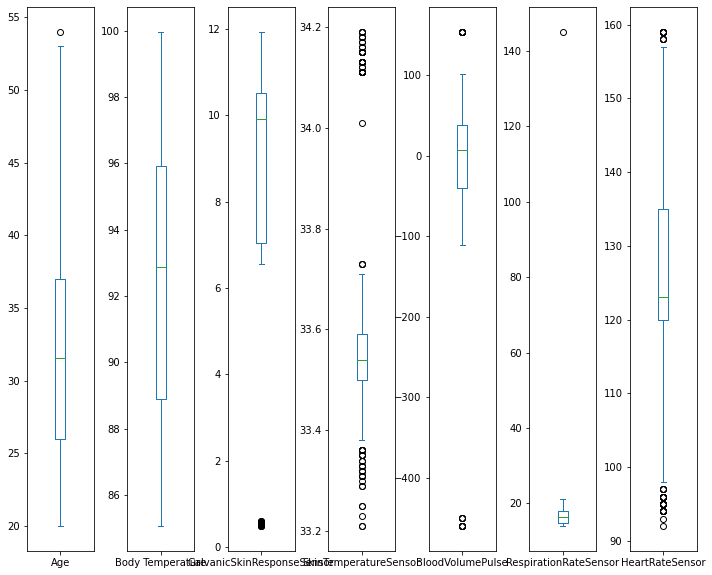

In [67]:

# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

import matplotlib.pyplot as plt

imputation1.plot(kind = 'box', subplots = True, sharey = False, figsize = (12,10))

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''

# increase spacing between subplots
plt.subplots_adjust(wspace = 0.50) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()


In [68]:

X.columns


Index(['Age', 'Gender', 'Body Temperature', 'Infrared Sensor',
       'GalvanicSkinResponseSensor', 'SkinTemperatureSensor',
       'BloodVolumePulse', 'RespirationRateSensor', 'HeartRateSensor',
       'MotionSensor'],
      dtype='object')

# Winsorizing Outliers with capping method 

In [69]:


from feature_engine.outliers import Winsorizer


In [70]:

winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                        tail='both', # cap left, right or both tails 
                        fold=1.5,
                        variables=['Age','GalvanicSkinResponseSensor', 'SkinTemperatureSensor','BloodVolumePulse', 'RespirationRateSensor', 'HeartRateSensor'])


# Replacing the Outlier Values Present in Below Columns 

In [71]:



clean = winsor.fit(imputation1[['Age','GalvanicSkinResponseSensor', 'SkinTemperatureSensor','BloodVolumePulse', 'RespirationRateSensor', 'HeartRateSensor']])



In [72]:


imputation1[['Age','GalvanicSkinResponseSensor', 'SkinTemperatureSensor','BloodVolumePulse', 'RespirationRateSensor', 'HeartRateSensor']] = clean.transform(imputation1[['Age','GalvanicSkinResponseSensor', 'SkinTemperatureSensor','BloodVolumePulse', 'RespirationRateSensor', 'HeartRateSensor']])



In [73]:

imputation1


,Age,Body Temperature,GalvanicSkinResponseSensor,SkinTemperatureSensor,BloodVolumePulse,RespirationRateSensor,HeartRateSensor
0,46.00,95.91,6.84,33.55,-18.39,15.60,123.00
1,36.00,89.32,6.59,33.55,-45.77,15.60,122.00
2,31.53,93.63,6.98,33.59,70.09,15.00,122.00
3,39.00,89.63,6.98,33.61,-48.23,17.12,121.00
4,51.00,93.65,7.09,33.57,7.87,14.70,120.00
...,...,...,...,...,...,...,...
271,28.00,99.41,1.83,33.36,37.31,17.90,97.50
272,37.00,91.28,1.83,33.36,-14.15,18.00,97.50
273,40.00,93.46,1.83,33.39,-14.15,18.30,98.00
274,32.00,94.41,1.83,33.38,-14.15,18.40,99.00


# Identifying the Outliers After Winsorization with the Help of Boxplot

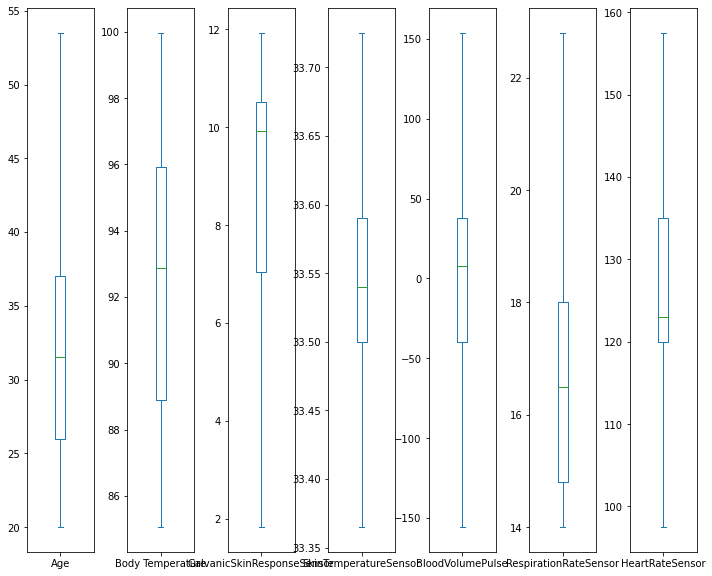

In [74]:



imputation1.plot(kind = 'box', subplots = True, sharey = False, figsize = (12,10)) 

# increase spacing between subplots
plt.subplots_adjust(wspace = 0.50)# ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()


# creating instance of Pipeline for MinMaxScaling

In [75]:


scale_pipeline = Pipeline([['scale', MinMaxScaler()]])


# Transforming the MinMaxScaling numeric Features into Scale_columntransformer

In [76]:


scale_columntransformer = ColumnTransformer([('scale', scale_pipeline, numeric_features)])

# After Columnstransformation for MinMaxScaling fitting the imputation1 numeric values into scale

In [77]:


scale = scale_columntransformer.fit(imputation1)



# Creating the Dataframe of minmaxscale values of imputation1 into scaled_data

In [78]:


scaled_data = pd.DataFrame(scale.transform(imputation1))


In [79]:

scaled_data


,0,1,2,3,4,5,6
0,0.78,0.73,0.50,0.51,0.44,0.18,0.42
1,0.48,0.29,0.47,0.51,0.36,0.18,0.41
2,0.34,0.57,0.51,0.62,0.73,0.11,0.41
3,0.57,0.31,0.51,0.69,0.35,0.35,0.39
4,0.93,0.58,0.52,0.57,0.53,0.08,0.38
...,...,...,...,...,...,...,...
271,0.24,0.96,0.00,0.00,0.62,0.44,0.00
272,0.51,0.42,0.00,0.00,0.46,0.45,0.00
273,0.60,0.56,0.00,0.07,0.46,0.49,0.01
274,0.36,0.63,0.00,0.04,0.46,0.50,0.02


# creating instance of Pipeline for OneHotEncoding

In [80]:


encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])


# Transforming the OneHotEncoding categorical Features into Preprocess_pipeline

In [81]:


preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])


# After Columnstransformation for OneHotEncoding fitting the preprocess_pipeline categorical values into clean

In [82]:


clean = preprocess_pipeline.fit(X)


# Creating the Dataframe of OneHotEncoding values of clean into encoded_data

In [83]:


encoded_data = pd.DataFrame(clean.transform(X).todense())


In [84]:

encoded_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
272,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
273,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
274,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


# Concating the Scaled_data, Encoded_data into Clean_data

In [85]:


clean_data = pd.concat([scaled_data, encoded_data], axis=1 , ignore_index = True)


# Splitting the lbdata Dataset into Train_test For ModelBuilding Purpose

In [86]:


from sklearn.model_selection import train_test_split


In [87]:

X_train, X_test, Y_train, Y_test = train_test_split(clean_data, Y, test_size = 0.2, random_state = 123)


In [88]:

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)


In [89]:

models, predictions =clf.fit(X_train, X_test, Y_train, Y_test)

print(models)


100%|██████████| 29/29 [00:02<00:00, 13.29it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearSVC                          1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
PassiveAggressiveClassifier        1.00               1.00    None      1.00   
LogisticRegression                 1.00               1.00    None      1.00   
LabelSpreading                     1.00               1.00    None      1.00   
KNeighborsClassifier               1.00               1.00    None      1.00   
LabelPropagation                   1.00               1.00    None      1.00   
SVC                                1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
ExtraTreeClassifier                0.98               0.99    None      0.98   
XGBClassifier                      0.98 